In [48]:
import pandas as pd 
import numpy as np 

train = pd.read_csv('../ML-DL Datasets/train.csv')
train.head(3)

,user_id,industry,location,moved_after_2019,ITU,YTU,anadolu_üniversitesi,diğer_school,ege_üniversitesi,hacettepe_üniversitesi,...,Software Development,Software Engineering,Spring Framework,Teamwork,Visual Studio,Web Development,XML,jQuery,other,skill_count
0,1301,Information Technology,istanbul,1,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,23.0
1,6950,Information Technology,istanbul,0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,49.0
2,4880,Others,diğer,0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,21.0


In [49]:
spec_cols = ['school_count', 'experience_month', 'exp_comp_count', 'language_count', 'skill_count', 'industry', 'location']
train[spec_cols].head()

,school_count,experience_month,exp_comp_count,language_count,skill_count,industry,location
0,2.0,92.0,4.0,2.0,23.0,Information Technology,istanbul
1,1.0,117.0,6.0,3.0,49.0,Information Technology,istanbul
2,2.0,108.0,4.0,0.0,21.0,Others,diğer
3,3.0,160.0,4.0,1.0,30.0,Information Technology,istanbul
4,2.0,160.0,3.0,2.0,48.0,Financial Services,istanbul


In [50]:
# scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [51]:
train[['school_count', 'experience_month', 'exp_comp_count', 'language_count', 'skill_count']] = sc.fit_transform(train[['school_count', 'experience_month', 'exp_comp_count', 'language_count', 'skill_count']])
train[['school_count', 'experience_month', 'exp_comp_count', 'language_count', 'skill_count']].head()

,school_count,experience_month,exp_comp_count,language_count,skill_count
0,-0.132132,-0.147686,0.487529,0.696960,0.140200
1,-1.002056,0.208104,1.384526,1.516626,2.018894
2,-0.132132,0.080019,0.487529,-0.942370,-0.004315
3,0.737792,0.820063,0.487529,-0.122705,0.646002
4,-0.132132,0.820063,0.039031,0.696960,1.946637


In [52]:
# label encoder
from sklearn.preprocessing import LabelEncoder
industry_le = LabelEncoder()
location_le = LabelEncoder()

In [53]:
train['industry'] = industry_le.fit_transform(train['industry'])
train['location'] = location_le.fit_transform(train['location'])
train[['industry', 'location']].head()

,industry,location
0,11,8
1,11,8
2,16,5
3,11,8
4,8,8


In [54]:
train[spec_cols].head()

,school_count,experience_month,exp_comp_count,language_count,skill_count,industry,location
0,-0.132132,-0.147686,0.487529,0.696960,0.140200,11,8
1,-1.002056,0.208104,1.384526,1.516626,2.018894,11,8
2,-0.132132,0.080019,0.487529,-0.942370,-0.004315,16,5
3,0.737792,0.820063,0.487529,-0.122705,0.646002,11,8
4,-0.132132,0.820063,0.039031,0.696960,1.946637,8,8


In [55]:
train = train.drop(['user_id'], axis=1)
X = train.drop(['moved_after_2019'], axis=1)
y = train[['moved_after_2019']]

In [56]:
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.75, random_state=123)

In [57]:
class_weight = {0:2, 1:3}

In [58]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(class_weight=class_weight)
rf.fit(X_train, np.ravel(y_train))

RandomForestClassifier(class_weight={0: 2, 1: 3})

In [59]:
rf_predictions = rf.predict(X_test)

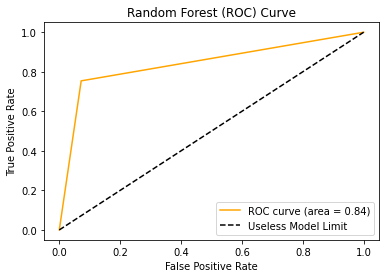

In [60]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt 

%matplotlib inline

fpr, tpr, thresholds = roc_curve(y_test, rf_predictions)
auc = roc_auc_score(y_test, rf_predictions)
class_report = pd.DataFrame(classification_report(y_test, rf_predictions, output_dict=True))

plt.plot(fpr, tpr, label=f'ROC curve (area = {auc:0.2f})', color='orange')
plt.plot([0, 1], [0, 1], 'k--', label='Useless Model Limit')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest (ROC) Curve')
plt.legend(loc="lower right")

plt.savefig('../Images/Random_Forest_Base_ROC.png')
plt.show()

In [61]:
class_report

,0,1,accuracy,macro avg,weighted avg
precision,0.857094,0.868391,0.860883,0.862743,0.861457
recall,0.928097,0.754054,0.860883,0.841075,0.860883
f1-score,0.891184,0.807194,0.860883,0.849189,0.858747
support,8136.000000,5119.000000,0.860883,13255.000000,13255.000000


In [62]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

rf = RandomForestClassifier(n_estimators=100)

param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 11),
              "min_samples_split": randint(2, 11),
              "min_samples_leaf": randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

n_iter_search = 20

random_search = RandomizedSearchCV(rf, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=5)

random_search.fit(X_train, np.ravel(y_train))

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, None],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000027763F2B670>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000027763EF0970>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000027763EFF3A0>})

In [63]:
print("En iyi parametreler:", random_search.best_params_)
print("En iyi doğruluk:", random_search.best_score_)

En iyi parametreler: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 9, 'min_samples_leaf': 3, 'min_samples_split': 4}
En iyi doğruluk: 0.8495876111693423


In [66]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(bootstrap=False, criterion='gini',
                                  max_depth=None, max_features=10,
                                  min_samples_leaf=6, min_samples_split=6,
                                  class_weight=class_weight)
rf_model.fit(X_train, np.ravel(y_train))

RandomForestClassifier(bootstrap=False, class_weight={0: 2, 1: 3},
                       max_features=10, min_samples_leaf=6,
                       min_samples_split=6)

In [72]:
y_pred = rf_model.predict(X_test)

In [73]:
class_report = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))
class_report

,0,1,accuracy,macro avg,weighted avg
precision,0.888645,0.774199,0.841192,0.831422,0.844447
recall,0.847468,0.831217,0.841192,0.839343,0.841192
f1-score,0.867568,0.801696,0.841192,0.834632,0.842129
support,8136.000000,5119.000000,0.841192,13255.000000,13255.000000


In [74]:
import joblib

# save the model
joblib.dump(rf_model, "../Boosts/BoostedModels/boosted_random_forest.joblib")

#load the model
# loaded_rf = joblib.load("./random_forest.joblib")

['../Boosts/boosted_random_forest.joblib']